In [1]:
import sys
import os
import datetime
import time
import numpy as np
import pandas as pd
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def plot_sonyc_ap_stats(exp_dir):
    # stats 파일 목록 가져오기
    stats_files = sorted(glob.glob(f'{exp_dir}/stats_*.pickle'), 
                        key=lambda x: int(Path(x).stem.split('_')[1]))

    # 각 에폭별 SONYC 클래스 AP 값 저장
    epochs = []
    sonyc_aps = []  # 각 에폭별 SONYC 클래스 AP 값들
    sonyc_mean_aps = []  # 각 에폭별 SONYC 클래스 평균 AP

    for stats_file in stats_files:
        epoch = int(Path(stats_file).stem.split('_')[1])
        epochs.append(epoch)
        
        with open(stats_file, 'rb') as f:
            stats = pickle.load(f)
        
        # SONYC 클래스 AP 값 추출 (527번부터)
        epoch_aps = [stat['AP'] for stat in stats[527:]]
        sonyc_aps.append(epoch_aps)
        sonyc_mean_aps.append(np.mean(epoch_aps))

    # 클래스별 AP 변화 그래프
    plt.figure(figsize=(8, 4))
    for class_idx in range(len(sonyc_aps[0])):
        class_aps = [epoch_aps[class_idx] for epoch_aps in sonyc_aps]
        plt.plot(epochs, class_aps, label=f'Class {527 + class_idx}')

    plt.xlabel('Epoch')
    plt.ylabel('AP')
    plt.title('SONYC Class AP Values Across Epochs')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 평균 AP 변화 그래프
    plt.figure(figsize=(8, 4))
    plt.plot(epochs, sonyc_mean_aps, 'r-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean AP')
    plt.title('Mean SONYC Class AP Across Epochs')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 최종 에폭의 각 클래스별 AP 값
    final_epoch = epochs[-1]
    final_aps = sonyc_aps[-1]
    plt.figure(figsize=(8, 4))
    plt.bar(range(527, 527 + len(final_aps)), final_aps)
    plt.xlabel('Class Index')
    plt.ylabel('AP')
    plt.title(f'Final AP Values for Each SONYC Class (Epoch {final_epoch})')
    plt.xticks(range(527, 527 + len(final_aps)))
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    # 최종 결과 출력
    print(f'Final Mean SONYC AP: {sonyc_mean_aps[-1]:.4f}')
    # 최종 에폭의 각 클래스별 AP 값
    print('Final AP values for each class:')
    for idx, ap in enumerate(final_aps):
        print(f'Class {527 + idx}: {ap:.4f}')

    # 평균 AP가 가장 높은 에폭 찾기
    best_epoch_idx = np.argmax(sonyc_mean_aps)
    best_epoch = epochs[best_epoch_idx]
    best_mean_ap = sonyc_mean_aps[best_epoch_idx]

    print(f'\nBest Mean SONYC AP: {best_mean_ap:.4f} (Epoch {best_epoch})')
    print(f'Best AP values for each class (Epoch {best_epoch}):')
    for idx, ap in enumerate(sonyc_aps[best_epoch_idx]):
        print(f'Class {527 + idx}: {ap:.4f}')



In [3]:
def plot_sonyc_ap_stats_all(exp_dir):
    # stats 파일 목록 가져오기
    stats_files = sorted(glob.glob(f'{exp_dir}/stats_*.pickle'), 
                        key=lambda x: int(Path(x).stem.split('_')[1]))

    # 각 에폭별 SONYC 클래스 AP 값 저장
    epochs = []
    sonyc_aps = []  # 각 에폭별 SONYC 클래스 AP 값들
    sonyc_mean_aps = []  # 각 에폭별 SONYC 클래스 평균 AP
    sonyc_class_indices = None  # SONYC 클래스 인덱스 저장

    for stats_file in stats_files:
        epoch = int(Path(stats_file).stem.split('_')[1])
        epochs.append(epoch)
        
        with open(stats_file, 'rb') as f:
            stats = pickle.load(f)
        
        # AP 값이 있는 클래스 인덱스 찾기
        if sonyc_class_indices is None:
            sonyc_class_indices = [idx for idx, stat in enumerate(stats) if stat['AP']]
        
        # 찾은 클래스들의 AP 값 추출
        epoch_aps = [stats[idx]['AP'] for idx in sonyc_class_indices]
        sonyc_aps.append(epoch_aps)
        sonyc_mean_aps.append(np.mean(epoch_aps))

    # 클래스별 AP 변화 그래프
    plt.figure(figsize=(10, 6))
    for class_idx, original_idx in enumerate(sonyc_class_indices):
        class_aps = [epoch_aps[class_idx] for epoch_aps in sonyc_aps]
        plt.plot(epochs, class_aps, label=f'Class {original_idx}')

    plt.xlabel('Epoch')
    plt.ylabel('AP')
    plt.title('SONYC Class AP Values Across Epochs')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 평균 AP 변화 그래프
    plt.figure(figsize=(10, 4))
    plt.plot(epochs, sonyc_mean_aps, 'r-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean AP')
    plt.title('Mean SONYC Class AP Across Epochs')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 최종 에폭의 각 클래스별 AP 값
    final_epoch = epochs[-1]
    final_aps = sonyc_aps[-1]
    plt.figure(figsize=(10, 4))

    # x축 값을 문자열로 변환
    x_labels = [str(idx) for idx in sonyc_class_indices]
    x_positions = range(len(x_labels))

    plt.bar(x_positions, final_aps)
    plt.xlabel('Class Index')
    plt.ylabel('AP')
    plt.title(f'Final AP Values for Each SONYC Class (Epoch {final_epoch})')
    plt.xticks(x_positions, x_labels, rotation=90)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

    # 최종 결과 출력
    print(f'Final Mean SONYC AP: {sonyc_mean_aps[-1]:.4f}')
    # 최종 에폭의 각 클래스별 AP 값
    print('Final AP values for each class:')
    for idx, ap in zip(sonyc_class_indices, final_aps):
        print(f'Class {idx}: {ap:.4f}')

    # 평균 AP가 가장 높은 에폭 찾기
    best_epoch_idx = np.argmax(sonyc_mean_aps)
    best_epoch = epochs[best_epoch_idx]
    best_mean_ap = sonyc_mean_aps[best_epoch_idx]

    print(f'\nBest Mean SONYC AP: {best_mean_ap:.4f} (Epoch {best_epoch})')
    print(f'Best AP values for each class (Epoch {best_epoch}):')
    for idx, ap in zip(sonyc_class_indices, sonyc_aps[best_epoch_idx]):
        print(f'Class {idx}: {ap:.4f}')

Available experiment directories:
- /home/taemyung_heo/workspace/github/whisper-at/src/whisper_at_train/exp/sonyc-ft-sonyc-whisper-high-lw_tr_1_8-large-v1-1e-5-15-0.75-ep20-bs48-ldaFalse-ls0.1-mix0.5-0-10-2505072350


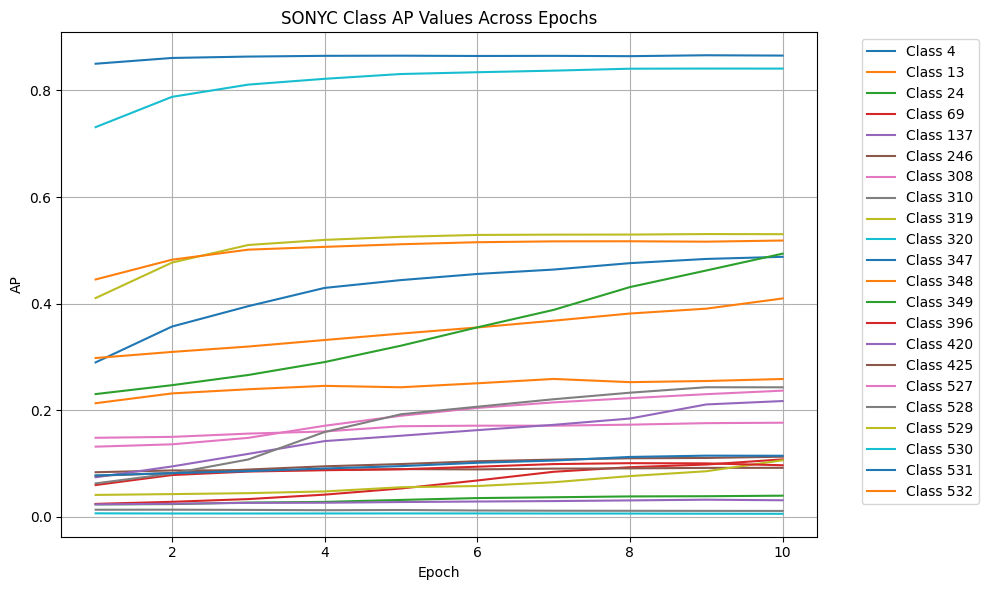

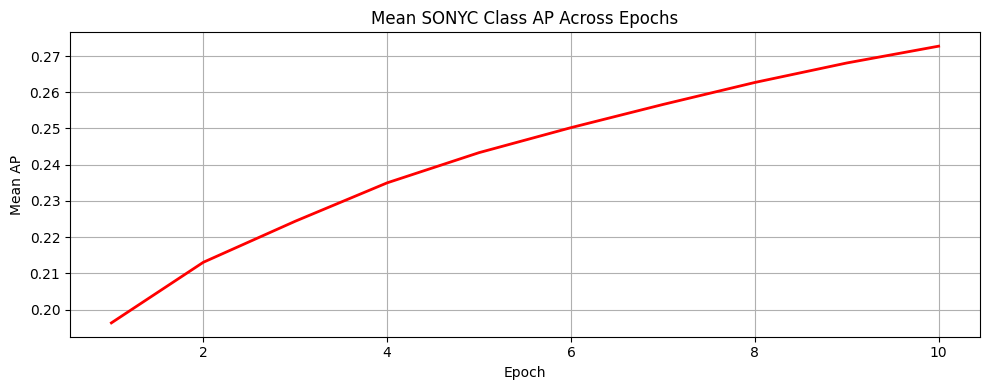

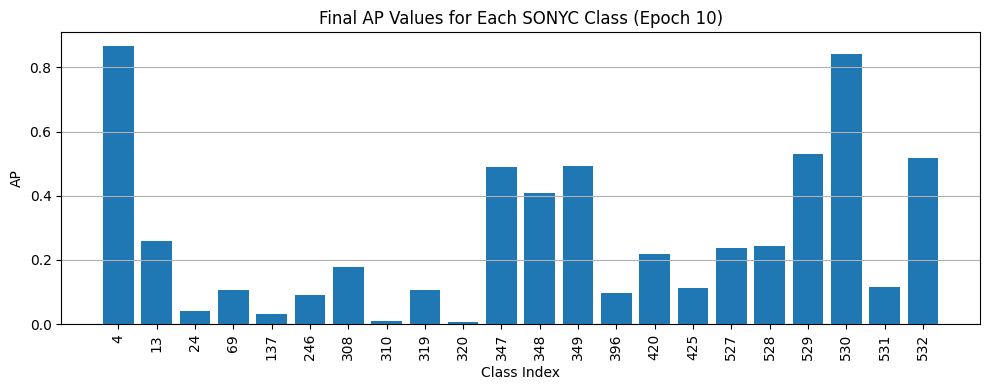

Final Mean SONYC AP: 0.2727
Final AP values for each class:
Class 4: 0.8655
Class 13: 0.2588
Class 24: 0.0399
Class 69: 0.1080
Class 137: 0.0313
Class 246: 0.0921
Class 308: 0.1768
Class 310: 0.0113
Class 319: 0.1064
Class 320: 0.0059
Class 347: 0.4880
Class 348: 0.4099
Class 349: 0.4939
Class 396: 0.0970
Class 420: 0.2174
Class 425: 0.1130
Class 527: 0.2369
Class 528: 0.2432
Class 529: 0.5305
Class 530: 0.8411
Class 531: 0.1148
Class 532: 0.5185

Best Mean SONYC AP: 0.2727 (Epoch 10)
Best AP values for each class (Epoch 10):
Class 4: 0.8655
Class 13: 0.2588
Class 24: 0.0399
Class 69: 0.1080
Class 137: 0.0313
Class 246: 0.0921
Class 308: 0.1768
Class 310: 0.0113
Class 319: 0.1064
Class 320: 0.0059
Class 347: 0.4880
Class 348: 0.4099
Class 349: 0.4939
Class 396: 0.0970
Class 420: 0.2174
Class 425: 0.1130
Class 527: 0.2369
Class 528: 0.2432
Class 529: 0.5305
Class 530: 0.8411
Class 531: 0.1148
Class 532: 0.5185
- /home/taemyung_heo/workspace/github/whisper-at/src/whisper_at_train/exp/son

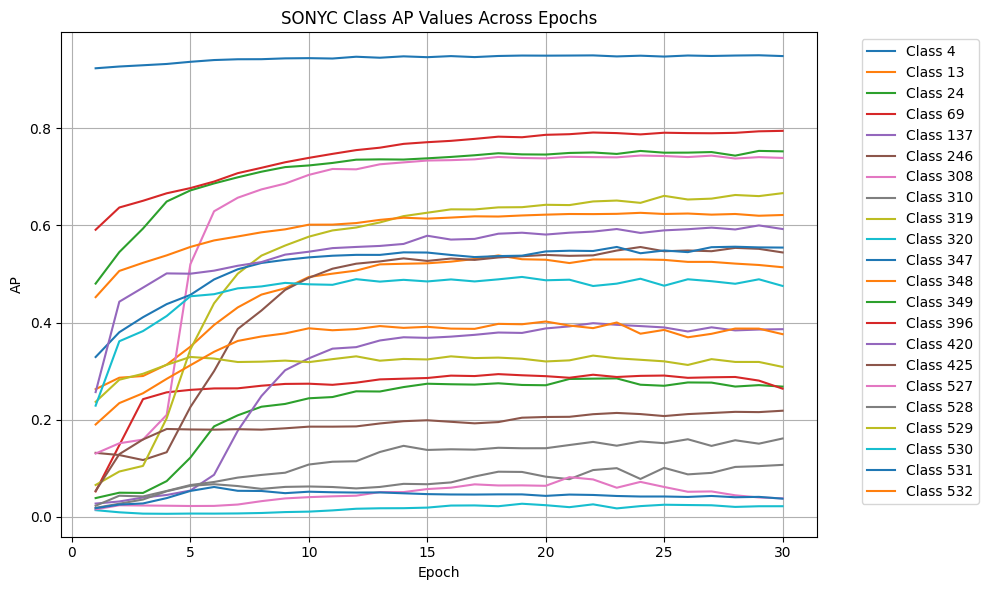

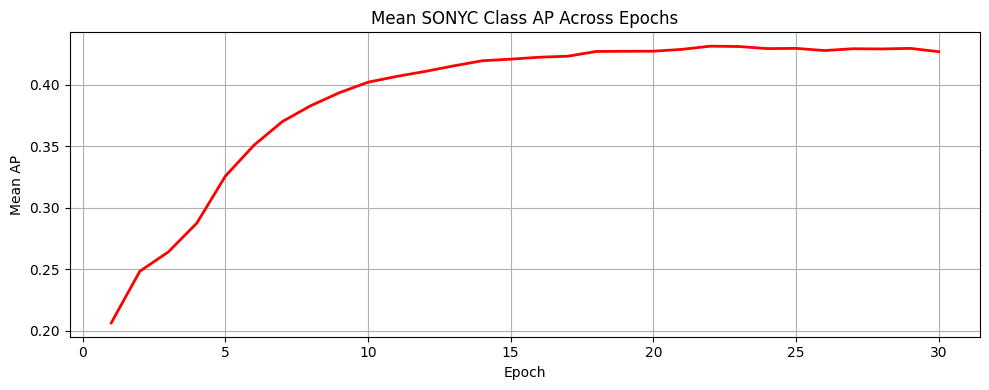

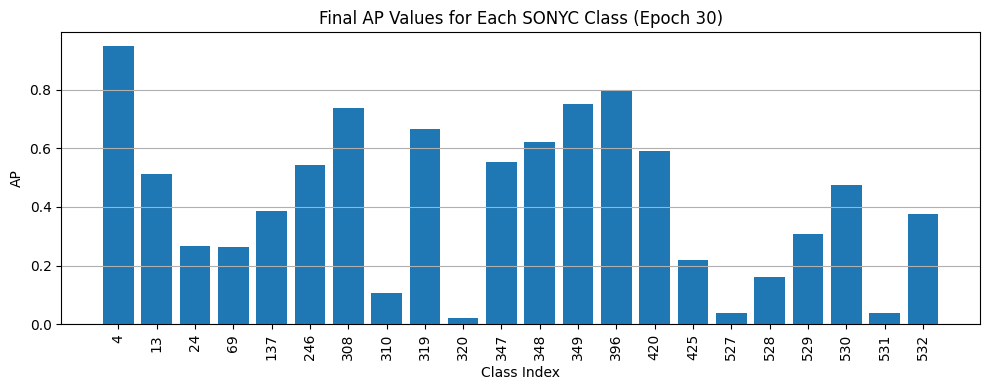

Final Mean SONYC AP: 0.4269
Final AP values for each class:
Class 4: 0.9484
Class 13: 0.5139
Class 24: 0.2682
Class 69: 0.2640
Class 137: 0.3864
Class 246: 0.5443
Class 308: 0.7388
Class 310: 0.1072
Class 319: 0.6663
Class 320: 0.0221
Class 347: 0.5544
Class 348: 0.6214
Class 349: 0.7524
Class 396: 0.7946
Class 420: 0.5925
Class 425: 0.2186
Class 527: 0.0383
Class 528: 0.1614
Class 529: 0.3088
Class 530: 0.4754
Class 531: 0.0376
Class 532: 0.3761

Best Mean SONYC AP: 0.4313 (Epoch 22)
Best AP values for each class (Epoch 22):
Class 4: 0.9498
Class 13: 0.5299
Class 24: 0.2846
Class 69: 0.2927
Class 137: 0.3988
Class 246: 0.5383
Class 308: 0.7405
Class 310: 0.0965
Class 319: 0.6493
Class 320: 0.0259
Class 347: 0.5473
Class 348: 0.6232
Class 349: 0.7500
Class 396: 0.7911
Class 420: 0.5872
Class 425: 0.2114
Class 527: 0.0772
Class 528: 0.1544
Class 529: 0.3321
Class 530: 0.4753
Class 531: 0.0453
Class 532: 0.3886
- /home/taemyung_heo/workspace/github/whisper-at/src/whisper_at_train/exp/son

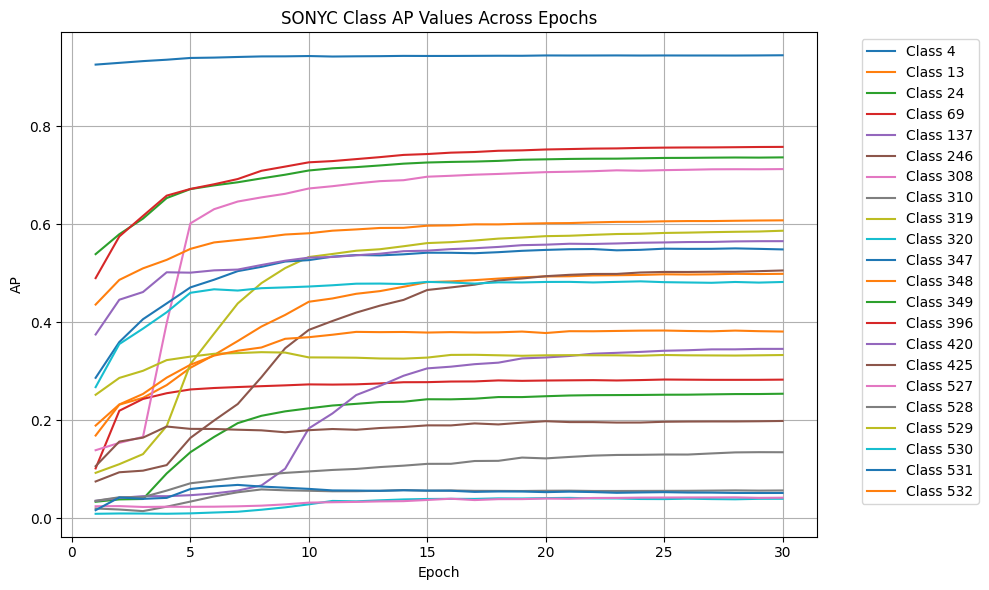

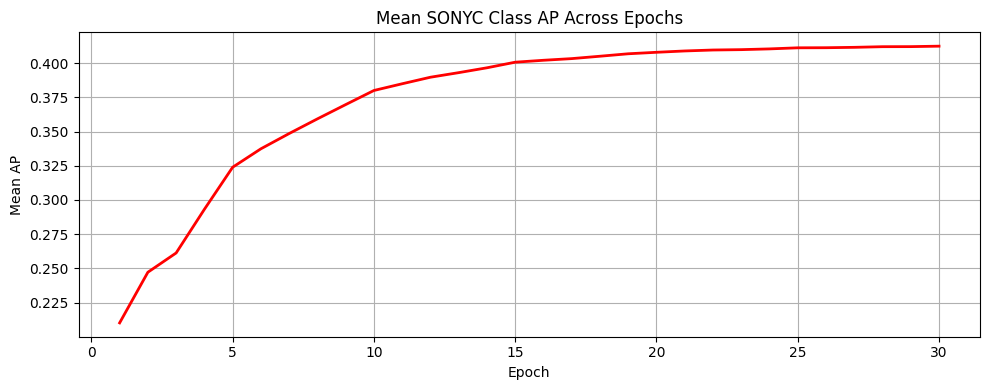

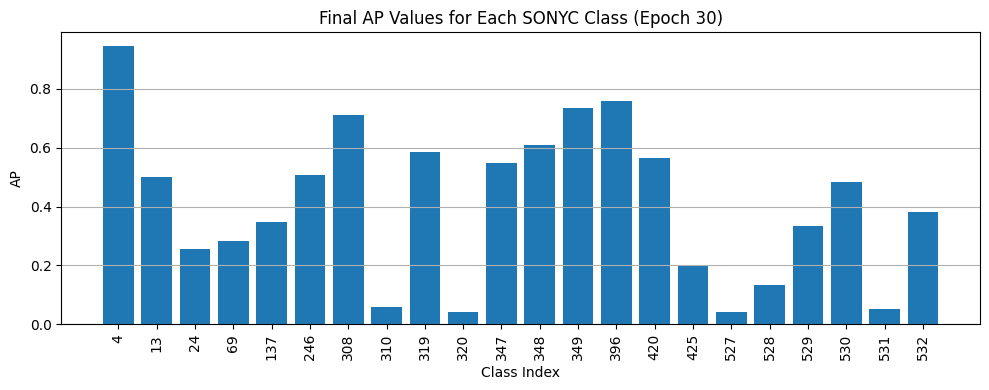

Final Mean SONYC AP: 0.4124
Final AP values for each class:
Class 4: 0.9451
Class 13: 0.4990
Class 24: 0.2543
Class 69: 0.2831
Class 137: 0.3458
Class 246: 0.5059
Class 308: 0.7128
Class 310: 0.0569
Class 319: 0.5870
Class 320: 0.0400
Class 347: 0.5488
Class 348: 0.6082
Class 349: 0.7367
Class 396: 0.7581
Class 420: 0.5657
Class 425: 0.1987
Class 527: 0.0421
Class 528: 0.1349
Class 529: 0.3333
Class 530: 0.4824
Class 531: 0.0518
Class 532: 0.3812

Best Mean SONYC AP: 0.4124 (Epoch 30)
Best AP values for each class (Epoch 30):
Class 4: 0.9451
Class 13: 0.4990
Class 24: 0.2543
Class 69: 0.2831
Class 137: 0.3458
Class 246: 0.5059
Class 308: 0.7128
Class 310: 0.0569
Class 319: 0.5870
Class 320: 0.0400
Class 347: 0.5488
Class 348: 0.6082
Class 349: 0.7367
Class 396: 0.7581
Class 420: 0.5657
Class 425: 0.1987
Class 527: 0.0421
Class 528: 0.1349
Class 529: 0.3333
Class 530: 0.4824
Class 531: 0.0518
Class 532: 0.3812
- /home/taemyung_heo/workspace/github/whisper-at/src/whisper_at_train/exp/son

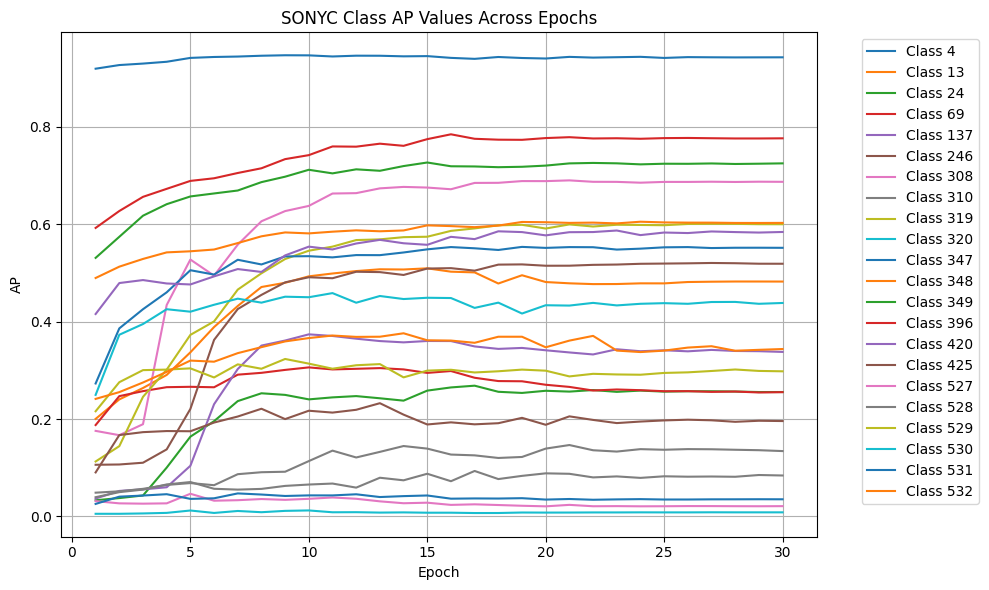

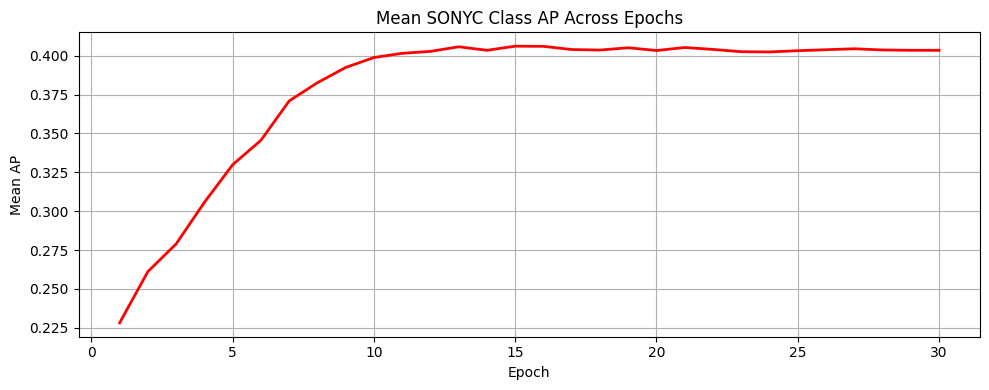

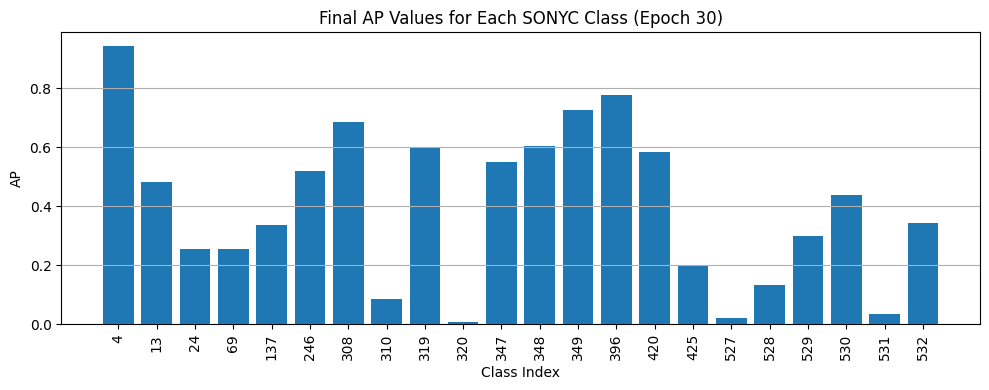

Final Mean SONYC AP: 0.4034
Final AP values for each class:
Class 4: 0.9424
Class 13: 0.4821
Class 24: 0.2554
Class 69: 0.2551
Class 137: 0.3377
Class 246: 0.5187
Class 308: 0.6869
Class 310: 0.0841
Class 319: 0.5998
Class 320: 0.0084
Class 347: 0.5514
Class 348: 0.6026
Class 349: 0.7248
Class 396: 0.7762
Class 420: 0.5839
Class 425: 0.1958
Class 527: 0.0211
Class 528: 0.1342
Class 529: 0.2979
Class 530: 0.4382
Class 531: 0.0352
Class 532: 0.3437

Best Mean SONYC AP: 0.4061 (Epoch 15)
Best AP values for each class (Epoch 15):
Class 4: 0.9449
Class 13: 0.5093
Class 24: 0.2583
Class 69: 0.2946
Class 137: 0.3602
Class 246: 0.5088
Class 308: 0.6751
Class 310: 0.0876
Class 319: 0.5742
Class 320: 0.0077
Class 347: 0.5482
Class 348: 0.5975
Class 349: 0.7265
Class 396: 0.7745
Class 420: 0.5576
Class 425: 0.1888
Class 527: 0.0282
Class 528: 0.1392
Class 529: 0.2993
Class 530: 0.4489
Class 531: 0.0430
Class 532: 0.3616
- /home/taemyung_heo/workspace/github/whisper-at/src/whisper_at_train/exp/son

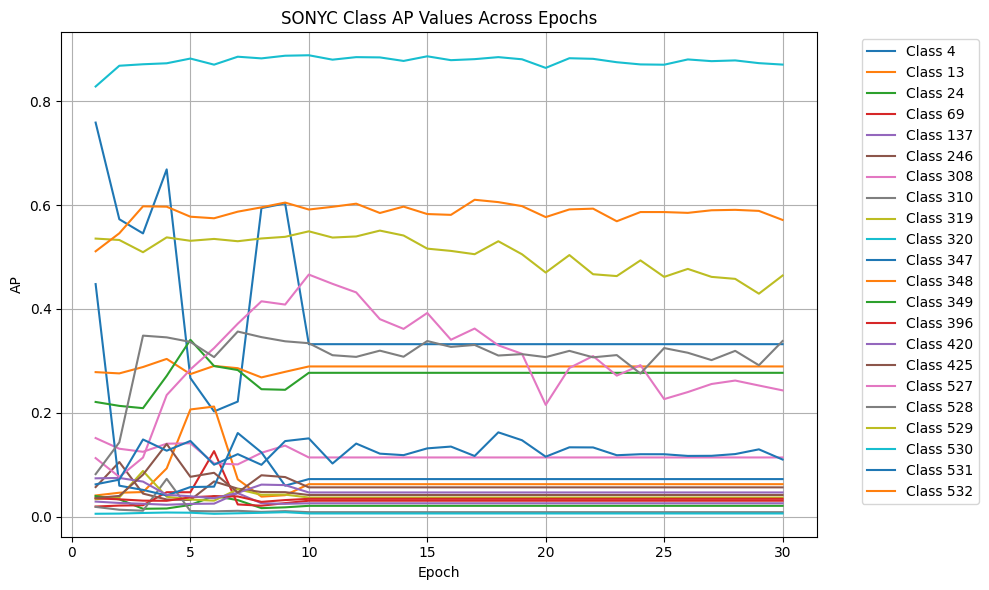

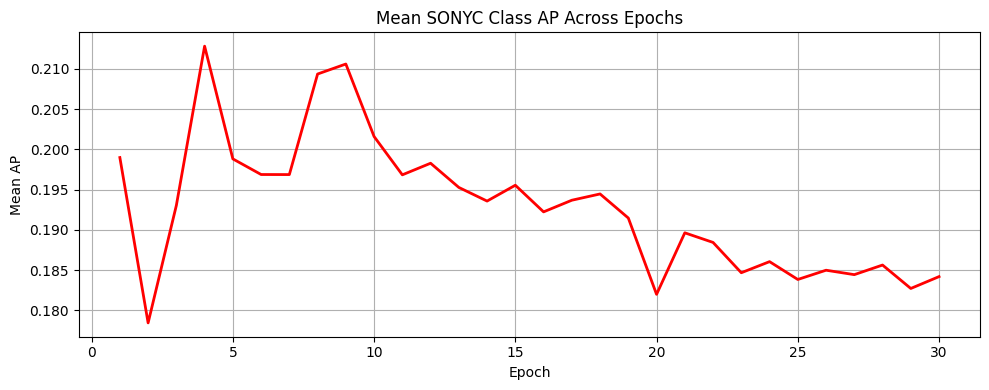

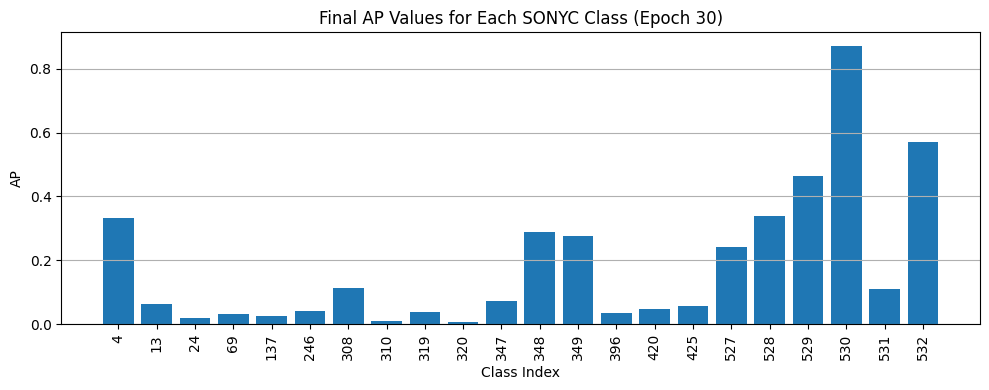

Final Mean SONYC AP: 0.1842
Final AP values for each class:
Class 4: 0.3321
Class 13: 0.0625
Class 24: 0.0208
Class 69: 0.0306
Class 137: 0.0257
Class 246: 0.0417
Class 308: 0.1140
Class 310: 0.0086
Class 319: 0.0368
Class 320: 0.0061
Class 347: 0.0723
Class 348: 0.2892
Class 349: 0.2770
Class 396: 0.0343
Class 420: 0.0466
Class 425: 0.0564
Class 527: 0.2432
Class 528: 0.3382
Class 529: 0.4643
Class 530: 0.8705
Class 531: 0.1100
Class 532: 0.5714

Best Mean SONYC AP: 0.2128 (Epoch 4)
Best AP values for each class (Epoch 4):
Class 4: 0.6687
Class 13: 0.0929
Class 24: 0.0157
Class 69: 0.0470
Class 137: 0.0229
Class 246: 0.0330
Class 308: 0.1405
Class 310: 0.0728
Class 319: 0.0383
Class 320: 0.0079
Class 347: 0.0408
Class 348: 0.3037
Class 349: 0.2710
Class 396: 0.0305
Class 420: 0.0421
Class 425: 0.1399
Class 527: 0.2341
Class 528: 0.3452
Class 529: 0.5378
Class 530: 0.8730
Class 531: 0.1270
Class 532: 0.5969


In [4]:
# exp 디렉토리 경로
exp_base_dir = '/home/taemyung_heo/workspace/github/whisper-at/src/whisper_at_train/exp'

# 모든 실험 디렉토리 목록 가져오기
exp_dirs = sorted(glob.glob(f'{exp_base_dir}/sonyc-ft-*'), 
                 key=lambda x: Path(x).name)

# 디렉토리 이름만 추출
exp_dir_names = [Path(d).name for d in exp_dirs]

print("Available experiment directories:")
for dir_name in exp_dirs:
    print(f"- {dir_name}")
    plot_sonyc_ap_stats_all(dir_name)
    print("="*80)

In [9]:
def plot_multiple_experiments(exp_dirs, exp_names):
    """
    Plot AP values for multiple experiments on the same graph.
    
    Args:
        exp_dirs (list): List of experiment directory paths
        exp_names (list): List of experiment names for the legend
    """
    plt.figure(figsize=(10, 6))
    
    for exp_dir, exp_name in zip(exp_dirs, exp_names):
        # Get stats files for this experiment
        stats_files = sorted(glob.glob(f'{exp_dir}/stats_*.pickle'), 
                           key=lambda x: int(Path(x).stem.split('_')[1]))
        
        # Calculate mean AP for each epoch
        epochs = []
        mean_aps = []
        
        for stats_file in stats_files:
            epoch = int(Path(stats_file).stem.split('_')[1])
            epochs.append(epoch)
            
            with open(stats_file, 'rb') as f:
                stats = pickle.load(f)
                
            epoch_aps = [stat['AP'] for stat in stats if stat['AP']]
            mean_aps.append(np.mean(epoch_aps))
        
        # Plot mean AP curve for this experiment
        plt.plot(epochs, mean_aps, label=exp_name, marker='o', markersize=4)
    
    plt.xlabel('Epoch')
    plt.ylabel('Mean AP')
    plt.title('Mean SONYC Class AP Comparison Across Experiments')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

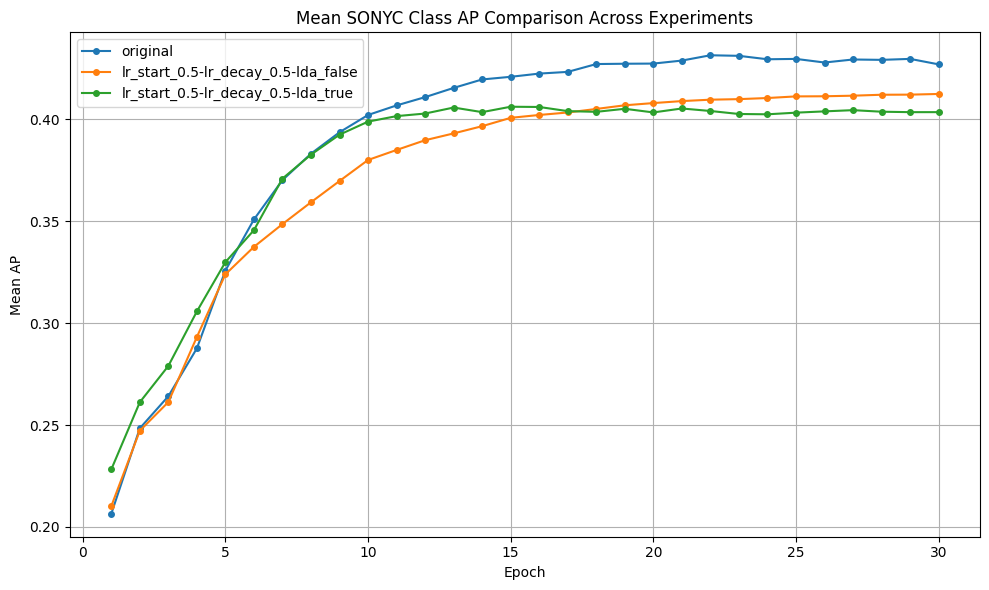

In [10]:
exp_base_dir = '/home/taemyung_heo/workspace/github/whisper-at/src/whisper_at_train/exp'

# 모든 실험 디렉토리 목록 가져오기
exp_dirs = sorted(glob.glob(f'{exp_base_dir}/sonyc-ft-*'), 
                 key=lambda x: Path(x).name)

# 디렉토리 이름만 추출
exp_dir_names = [Path(d).name for d in exp_dirs]

exp_names = [
    "original",
    "lr_start_0.5-lr_decay_0.5-lda_false",
    "lr_start_0.5-lr_decay_0.5-lda_true",
]

plot_multiple_experiments(exp_dirs, exp_names)